In [1]:
%matplotlib inline
import seaborn as sns
import sys, os
import numpy as np
from numpy import pi
import matplotlib.pyplot as plt
import matplotlib.ticker
from matplotlib import rc, rcParams
import matplotlib.cm as cm
from mpl_toolkits.axes_grid1 import make_axes_locatable
import time
import pandas
from scipy import interpolate

# Make use of TeX\ufeff
rc('text',usetex=True)
# Change all fonts to 'Computer Modern'
rc('font',**{'size':14, 'family':'serif','serif':['Times New Roman']})
rc('xtick.major', size=5, pad=7)
rc('xtick', labelsize=15)
rc('ytick.major', size=5, pad=7)
rc('ytick', labelsize=15)

# this needs to point to the folder where darkelf.py is stored
work_dir = os.getcwd()
sys.path.append(work_dir+"/..")
plotdir=work_dir+"/plots/"

draftdir="/Users/knapen/Documents/work/projects/DM_stuff/multiphonon/figures/"

# load the package
from darkelf import darkelf, targets

gaas = darkelf(target='GaAs')
print("------")
si = darkelf(target='Si')
print("------")
diamond = darkelf(target='C')
print("------")
ge = darkelf(target='Ge')
print("------")

 .... Loading files for GaAs
Loaded GaAs_mermin.dat for epsilon in electron regime
electronic ELF taken or calculated from Y. Tu, C. Kwei and C. Tung,Angular and energy dependences of the surface excitation parameter for semiconducting iii–v compounds, Surface Science601(2007) 865.
Warning! eps for phonon frequencies not loaded. Need to set phonon_filename to perform data-driven, single phonon calculations
Warning! Atomic Migdal calculation not present
Warning! Momentum Zion not loaded. Using Z - number of valence electrons.
Loaded Ga_atomic_Zion.dat and As_atomic_Zion.dat for effective charges
Loaded Ga_pDoS.dat and As_pDoS.dat for partial densities of states
Loaded Fn(omega) functions corresponding to density of states in:  Ga_pDoS.dat   As_pDoS.dat
------
 .... Loading files for Si
Loaded Si_gpaw_withLFE.dat for epsilon in electron regime
electronic ELF taken or calculated from J. Enkovaara et al.,Electronic structure calculations with GPAW: a real-space implementation of the projec

In [2]:
npoints = 100
qrange = np.linspace(gaas.qmin(0.1),gaas.qmax(0.1), npoints)

fd = np.array([gaas.fd_darkphoton[i](qrange) for i in range(2)])*np.sqrt(gaas.debye_waller(qrange)).T

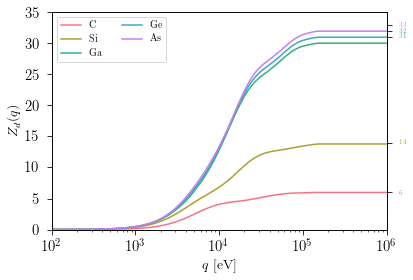

In [3]:
colors = sns.color_palette("husl", 5)

qrange=np.logspace(2,6,100)

si_fd=si.fd_darkphoton(qrange)
ge_fd=ge.fd_darkphoton(qrange)
ga_fd=gaas.fd_darkphoton[0](qrange)
as_fd=gaas.fd_darkphoton[1](qrange)
diamond_fd=diamond.fd_darkphoton(qrange)

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(qrange,diamond_fd,label="C", color=colors[0])
ax1.plot(qrange,si_fd,label="Si", color=colors[1])
ax1.plot(qrange,ga_fd,label="Ga", color=colors[2])
ax1.plot(qrange,ge_fd,label="Ge", color=colors[3])
ax1.plot(qrange,as_fd,label="As", color=colors[4])

#plt.plot(qrange,np.ones(len(qrange))*14,"--", color=colors[0])
#plt.plot(qrange,np.ones(len(qrange))*32,"--", color=colors[1])
#plt.plot(qrange,np.ones(len(qrange))*6,"--", color=colors[2])
#plt.plot(qrange,np.ones(len(qrange))*31,"--", color=colors[3])
#plt.plot(qrange,np.ones(len(qrange))*33,"--", color=colors[4])
ax1.set_xlim(100,1e6)
ax1.set_ylim(0,35)
ax2.set_ylim(0,35)
ax2.set_yticks([6,14,31,32,33])
ax2.tick_params(direction='out', labelsize=6)
ax1.set_xscale("log")
ax1.legend(ncol=2,fontsize=10)
ax1.set_xlabel(r"$q$ [eV]")
ax1.set_ylabel(r"$Z_d(q)$")

for ticklabel, tickcolor in zip(ax2.get_yticklabels(), colors):
    ticklabel.set_color(tickcolor)


fig.savefig(draftdir+"Zeff.pdf",bbox_inches='tight')

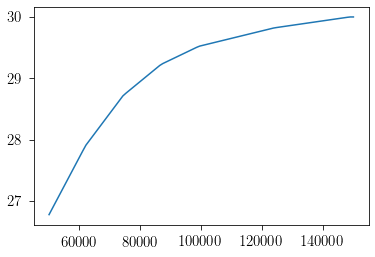

In [4]:
npoints = 100
qrange = np.linspace(5.0e4,1.5e5, npoints)
ga_fd=gaas.fd_darkphoton[0](qrange)

plt.plot(qrange,ga_fd)

In [5]:
ga_fd

array([26.77827972, 26.87303284, 26.96778597, 27.0625391 , 27.15729222,
       27.25204535, 27.34679847, 27.4415516 , 27.53630472, 27.63105785,
       27.72581097, 27.8205641 , 27.91168454, 27.97849242, 28.0453003 ,
       28.11210818, 28.17891606, 28.24572394, 28.31253182, 28.3793397 ,
       28.44614757, 28.51295545, 28.57976333, 28.64657121, 28.71337909,
       28.7582188 , 28.79936268, 28.84050656, 28.88165043, 28.92279431,
       28.96393819, 29.00508206, 29.04622594, 29.08736982, 29.12851369,
       29.16965757, 29.21080145, 29.24198786, 29.2660224 , 29.29005695,
       29.31409149, 29.33812603, 29.36216057, 29.38619511, 29.41022965,
       29.4342642 , 29.45829874, 29.48233328, 29.50636782, 29.52677646,
       29.53903815, 29.55129984, 29.56356153, 29.57582322, 29.58808491,
       29.6003466 , 29.61260829, 29.62486998, 29.63713167, 29.64939336,
       29.66165505, 29.67391674, 29.68617843, 29.69844012, 29.71070181,
       29.7229635 , 29.73522519, 29.74748688, 29.75974857, 29.77